<a href="https://colab.research.google.com/github/Pattiecodes/earthquake-tsunami-prediction/blob/main/JPBDEOCAMPO_DSS110_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**
 **Project Title:** Tsunami Prediction System

 **Goal:** To develop a machine learning model that can accurately predict the likelihood of a tsunami occurring after an earthquake based on various seismic and geographical features.

 **Business Impact:** Early and accurate prediction of tsunamis can significantly improve disaster preparedness, enabling timely evacuations and minimizing loss of life and property in coastal areas.

 ### **By: James Patrick De Ocampo**


 ### **DSS110 - Final Project**

# Data Loading
The earthquake data was loaded from the earthquake_data_tsunami.csv file into a pandas DataFrame named earthquake_data.

The first few rows and the data types were inspected to ensure correct loading and initial understanding of the data structure.


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
earthquake_data = pd.read_csv('/content/drive/MyDrive/DSS110-IPYNB/Final_Project/earthquake_data_tsunami.csv')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving earthquake_data_tsunami.csv to earthquake_data_tsunami (1).csv


Load the earthquake data from the provided CSV file into a pandas DataFrame. Display the head and data types of the DataFrame to verify the loading was successful.

In [ ]:
print("First few rows of the DataFrame:")
display(earthquake_data.head())
print("\nData types of the DataFrame:")
display(earthquake_data.info())

First few rows of the DataFrame:


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1



Data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


None

# Data Cleaning and Preprocessing
**Missing Values:** A check for missing values revealed that there were no missing values in any of the columns.

**Data Types:** The data types of all columns were reviewed and found to be appropriate.

In [ ]:
print("Missing values per column:")
print(earthquake_data.isnull().sum())

Missing values per column:
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


**Outliers:** Outliers were identified in several numerical columns through descriptive statistics and box plots. However, a decision was made not to remove or transform these outliers as they might represent significant real-world events crucial for prediction.

In [ ]:
print("\nData types of the DataFrame:")
display(earthquake_data.info())

print("\nDescriptive statistics of numerical columns:")
display(earthquake_data.describe())


Data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


None


Descriptive statistics of numerical columns:


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


Based on the descriptive statistics, some columns like sig, nst, dmin, gap, depth, magnitude_depth_interaction, earthquake_intensity, and seismic_activity_index show a large difference between the 75th percentile and the maximum value, indicating potential outliers. Visualize these columns using box plots to further investigate.

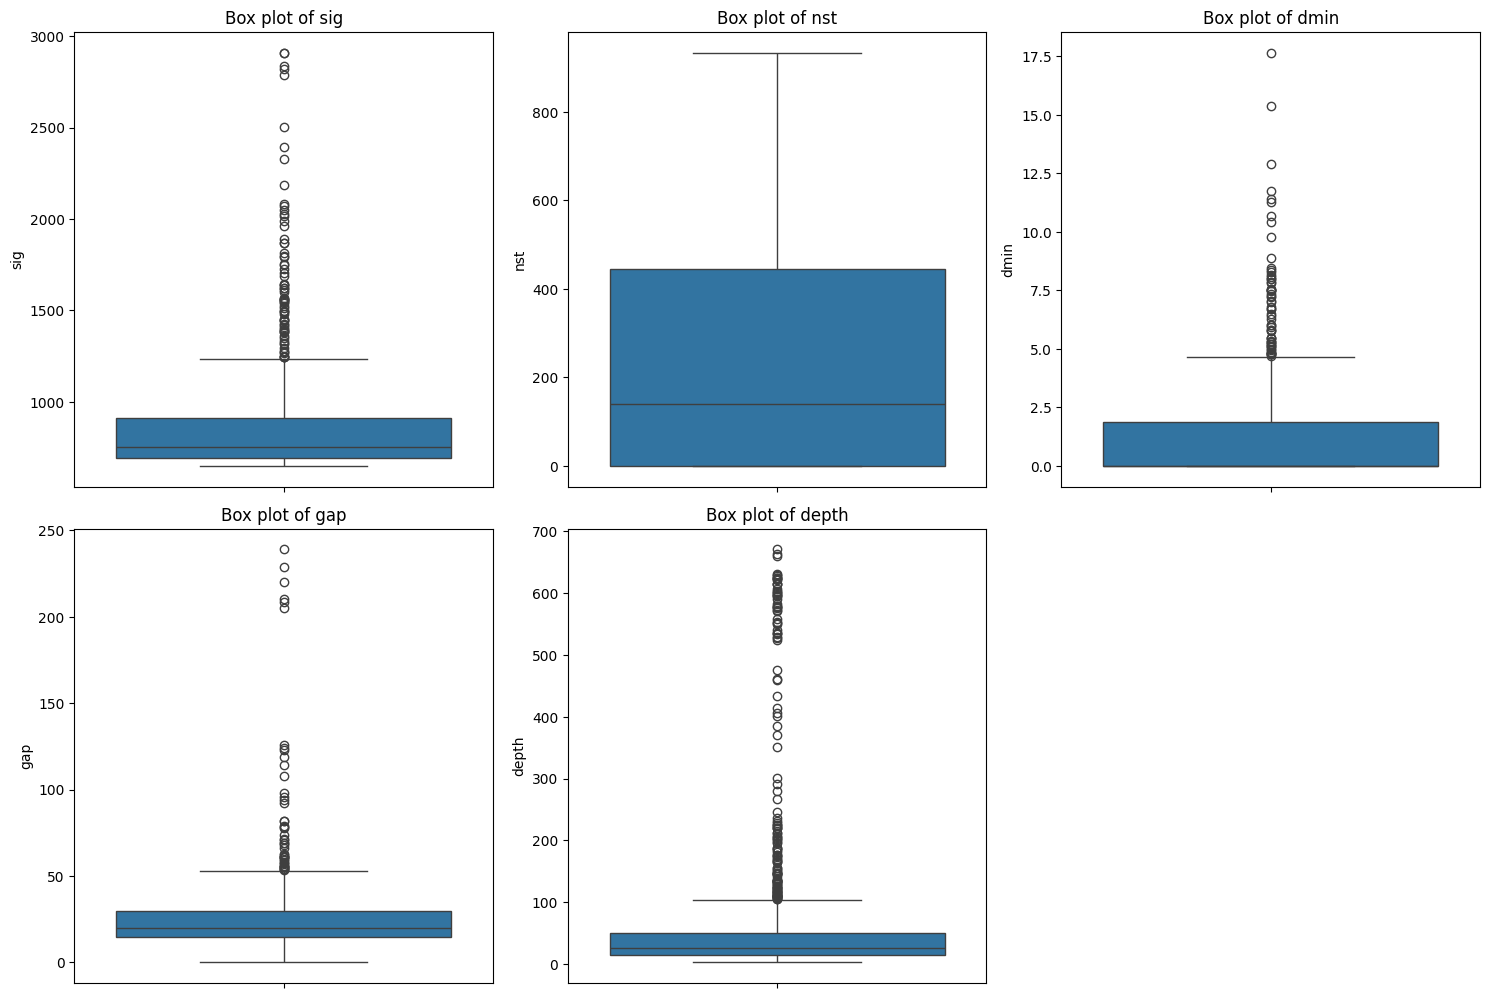

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_with_potential_outliers = ['sig', 'nst', 'dmin', 'gap', 'depth']
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols_with_potential_outliers):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=earthquake_data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Feature Engineering
Several new features were engineered from the existing data to potentially enhance the model's predictive capability:
 - magnitude_depth_interaction: Product of magnitude and depth.
 - location_score: Sum of the absolute values of latitude and longitude.
 - earthquake_intensity: Sum of cdi, mmi, and sig.
 - seismic_activity_index: Sum of nst, dmin, and gap.

Create the new features as specified in the instructions and display the head of the dataframe to verify the creation.

In [ ]:
earthquake_data['magnitude_depth_interaction'] = earthquake_data['magnitude'] * earthquake_data['depth']
earthquake_data['location_score'] = earthquake_data['latitude'].abs() + earthquake_data['longitude'].abs()
earthquake_data['earthquake_intensity'] = earthquake_data['cdi'] + earthquake_data['mmi'] + earthquake_data['sig']
earthquake_data['seismic_activity_index'] = earthquake_data['nst'] + earthquake_data['dmin'] + earthquake_data['gap']

display(earthquake_data.head())

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,magnitude_depth_interaction,location_score,earthquake_intensity,seismic_activity_index
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,98.0000,169.3923,783,134.509
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,172.5000,105.6939,743,135.229
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,4053.0000,198.3968,761,168.125
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,270.1000,191.4208,843,171.865
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,4121.4624,203.8728,672,162.998


# Exploratory Data Analysis (EDA)
EDA was performed to gain insights into the data:
- **Distributions:** Histograms showed the distributions of numerical features.
- **Frequencies:** Count plots illustrated the frequency of earthquakes by year and month.
- **Tsunami Relationships:** Box plots and bar plots visualized the relationship between features and the occurrence of tsunamis. These plots helped identify potential predictors and the class imbalance in the target variable.
- **Correlation:** A correlation matrix highlighted the relationships between numerical features and the target variable, revealing some moderate correlations.
- **Geographical Visualization:** Interactive maps (marker map and heatmap) were created to visualize the spatial distribution of earthquakes and tsunamis, identifying regions with higher seismic activity and clusters of tsunami occurrences.


To understand the data distribution, feature relationships, and identify patterns related to tsunamis.

Generate histograms for the numerical features, create bar plots for Year and Month and their relationship with the target variable 'tsunami', create box plots for numerical features versus the target variable 'tsunami', and compute and visualize the correlation matrix of the numerical features and the target variable.

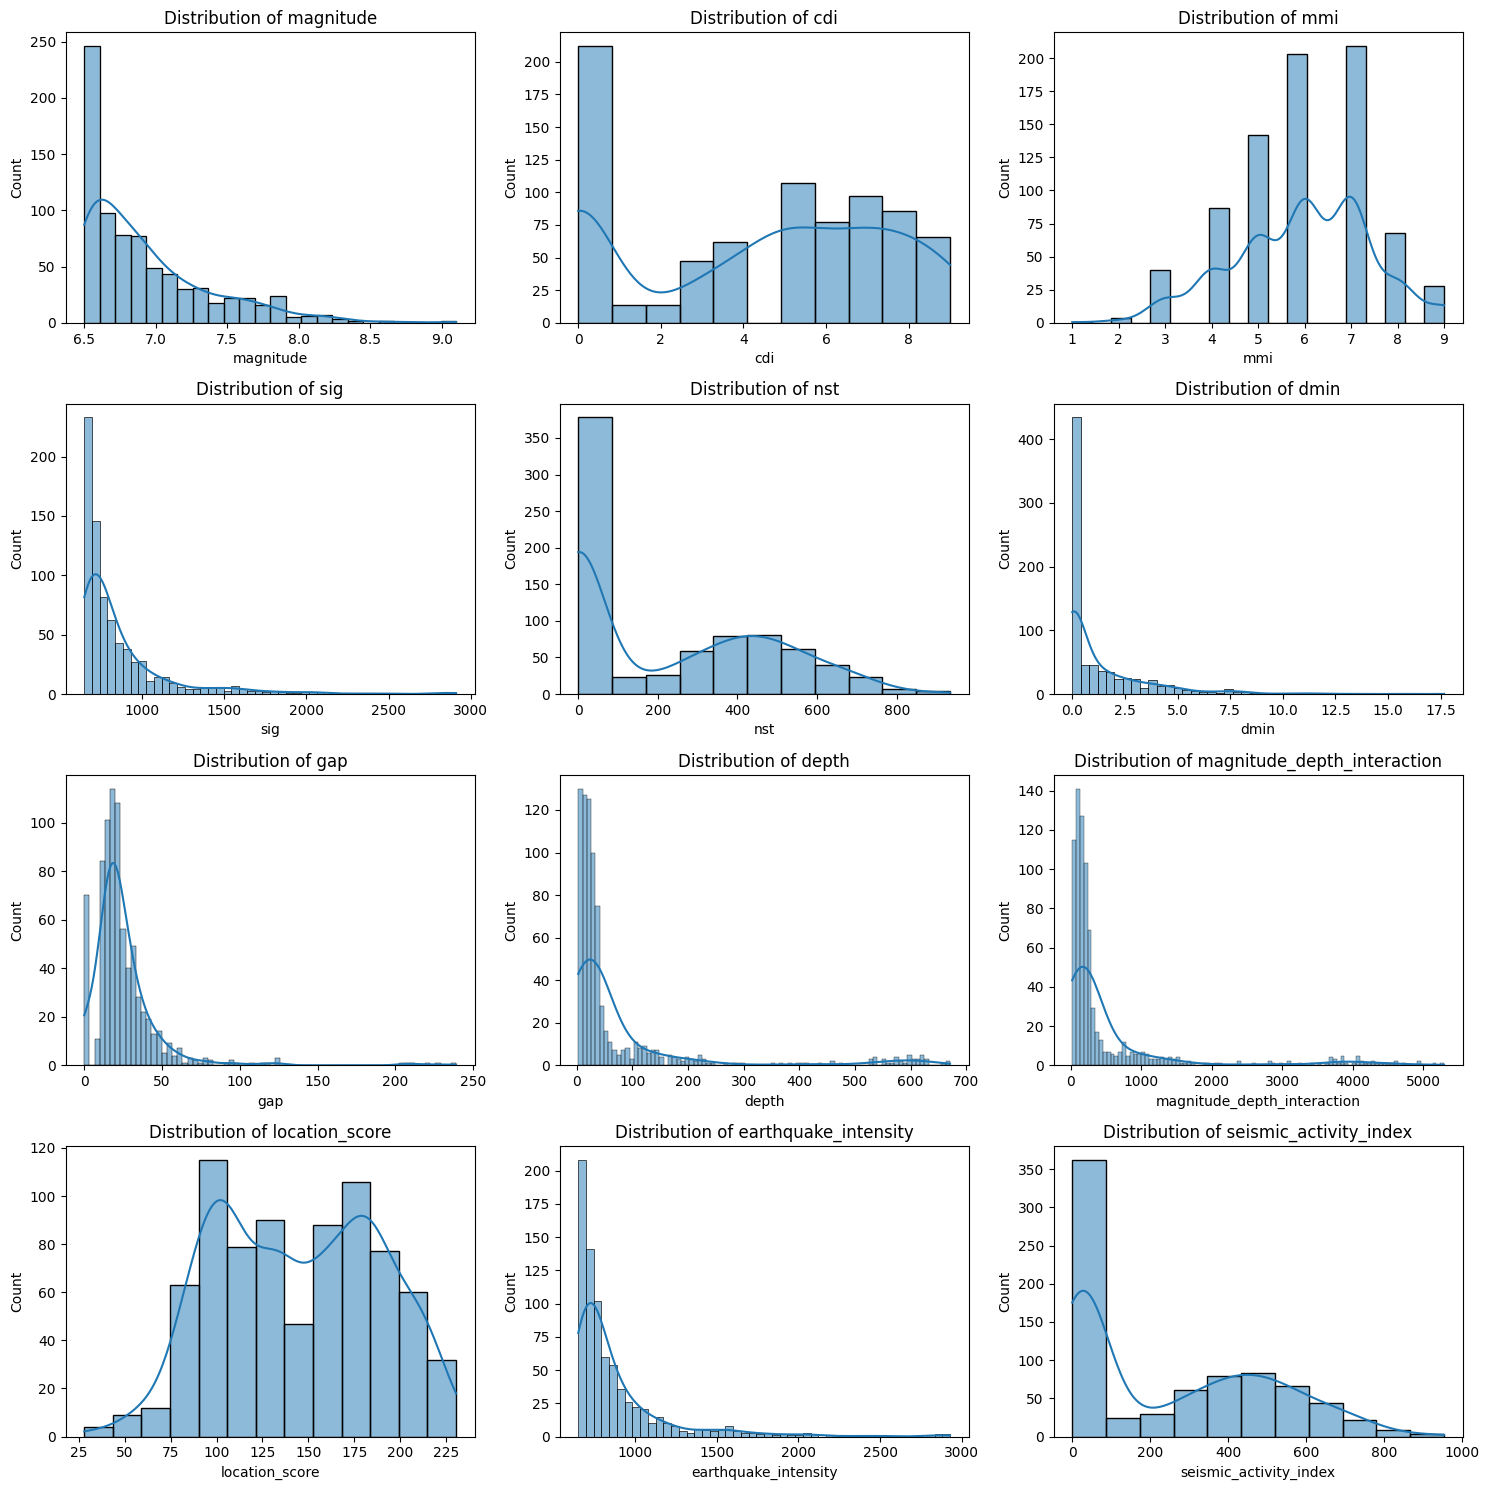

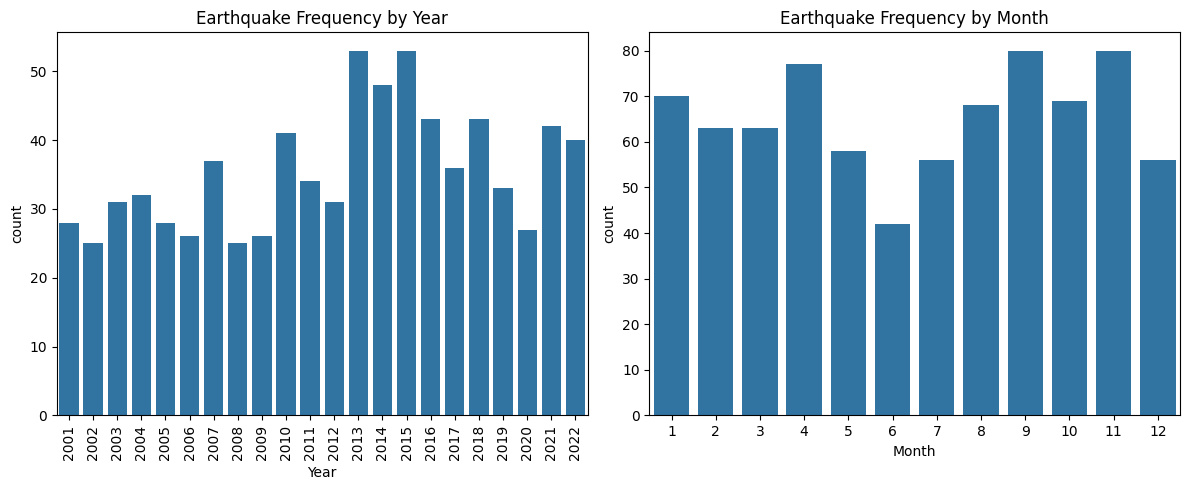

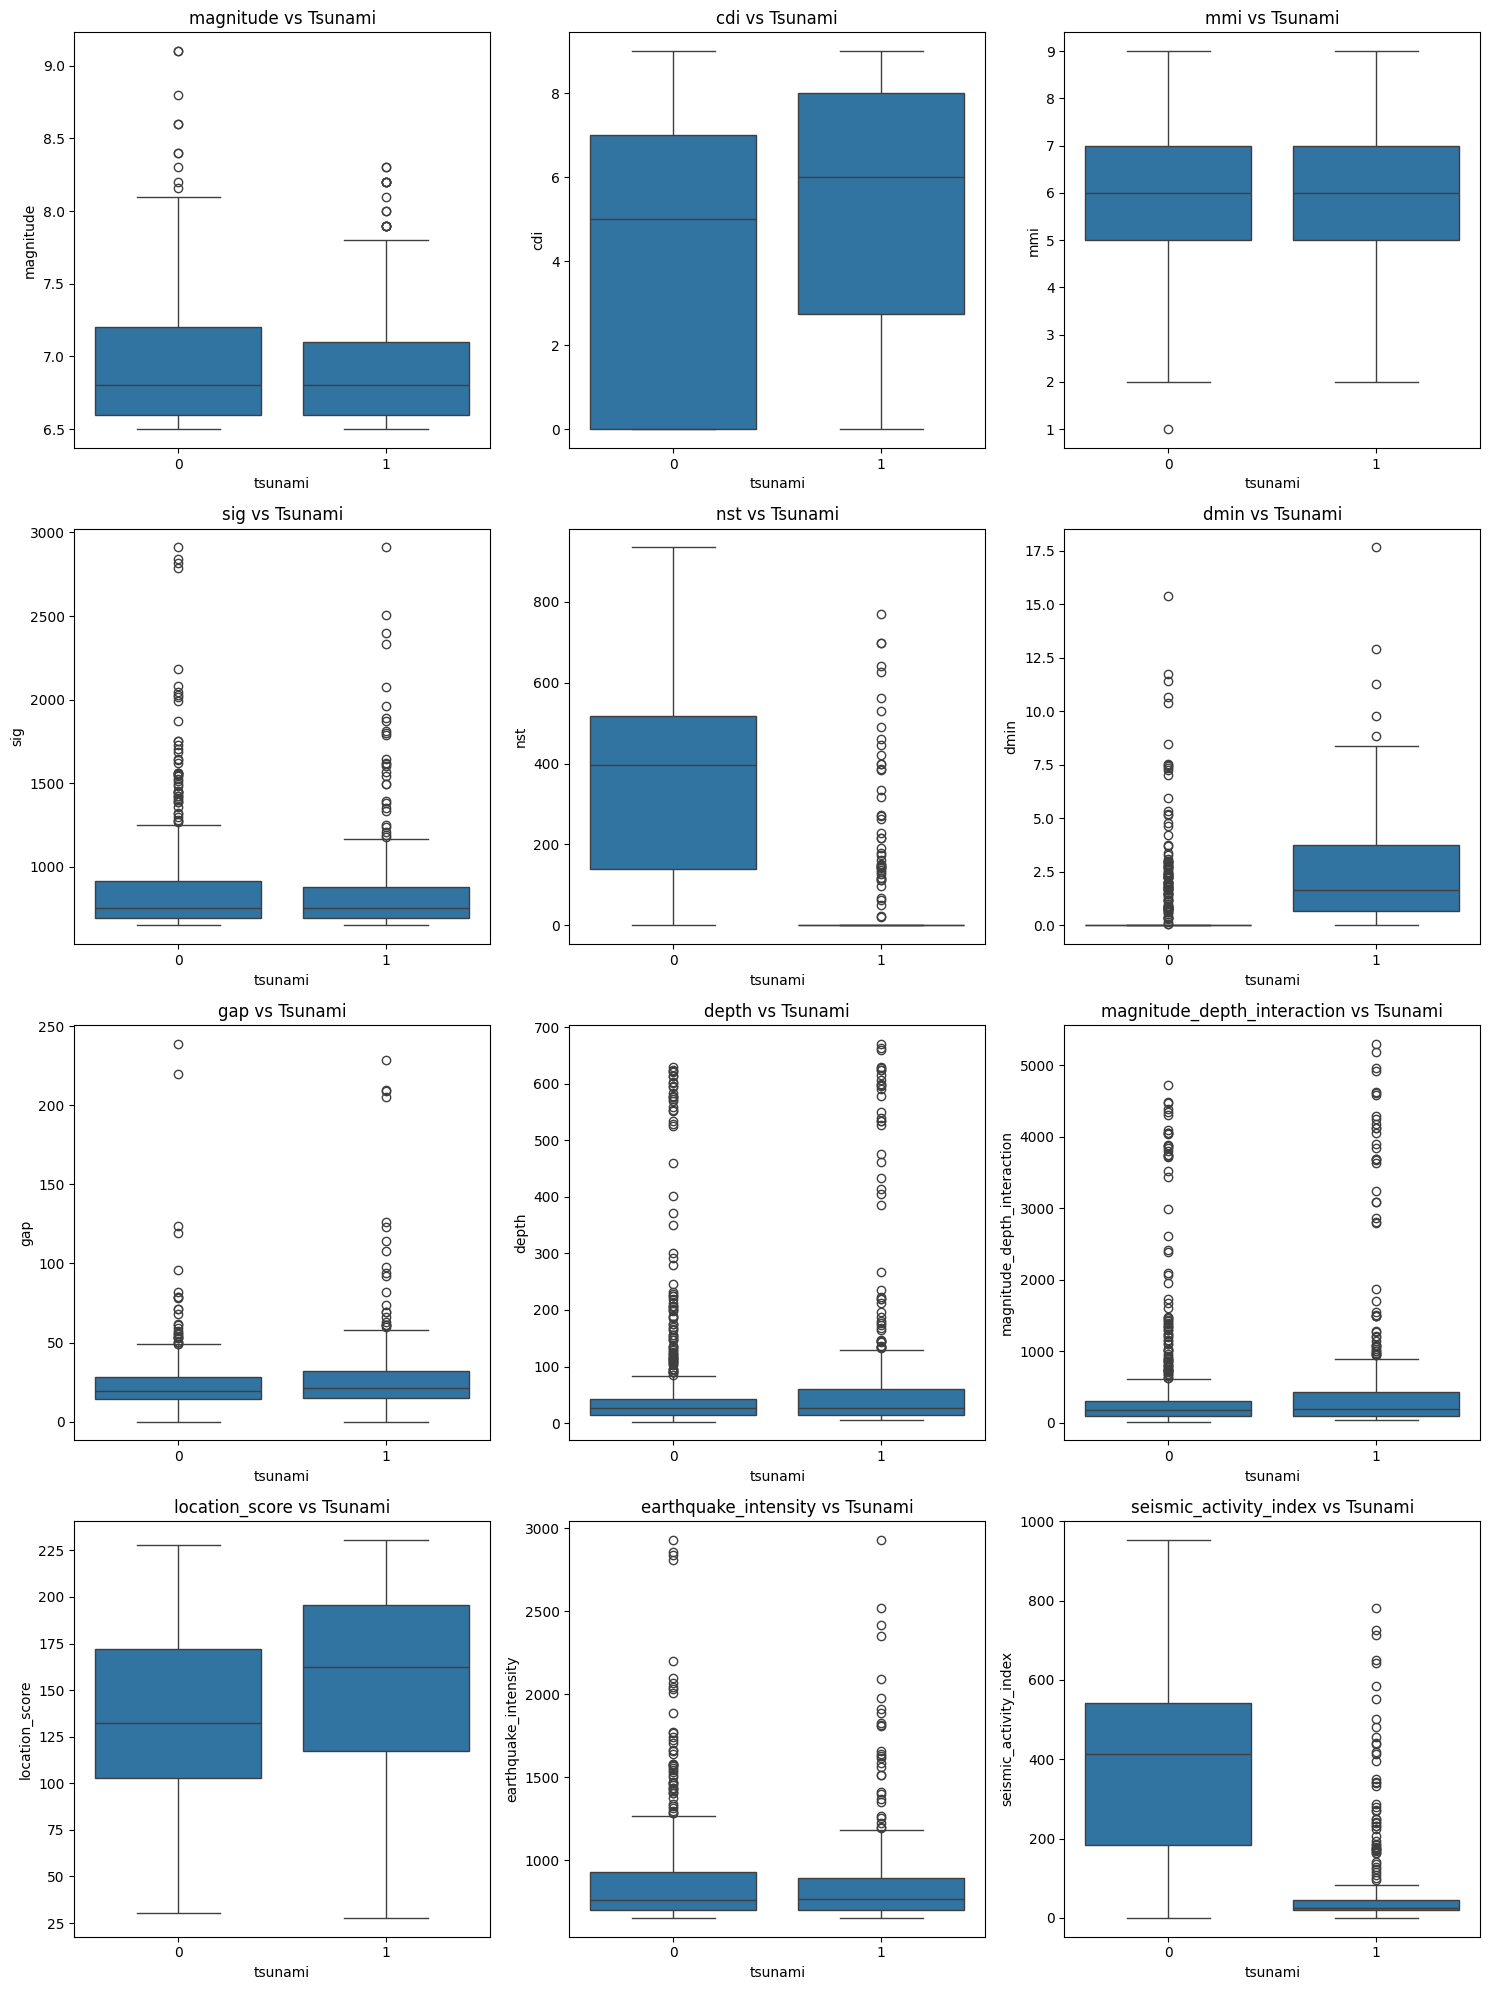

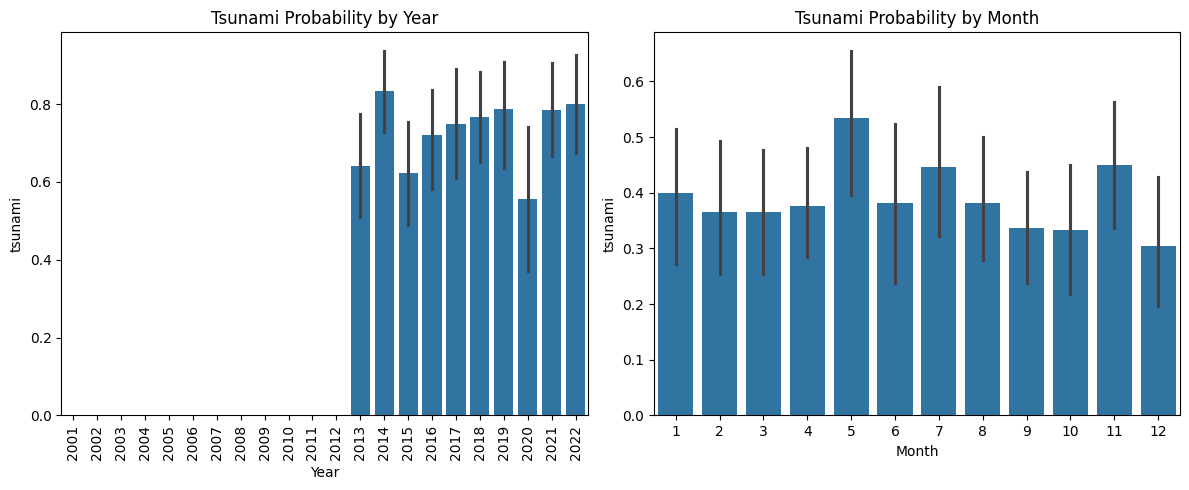

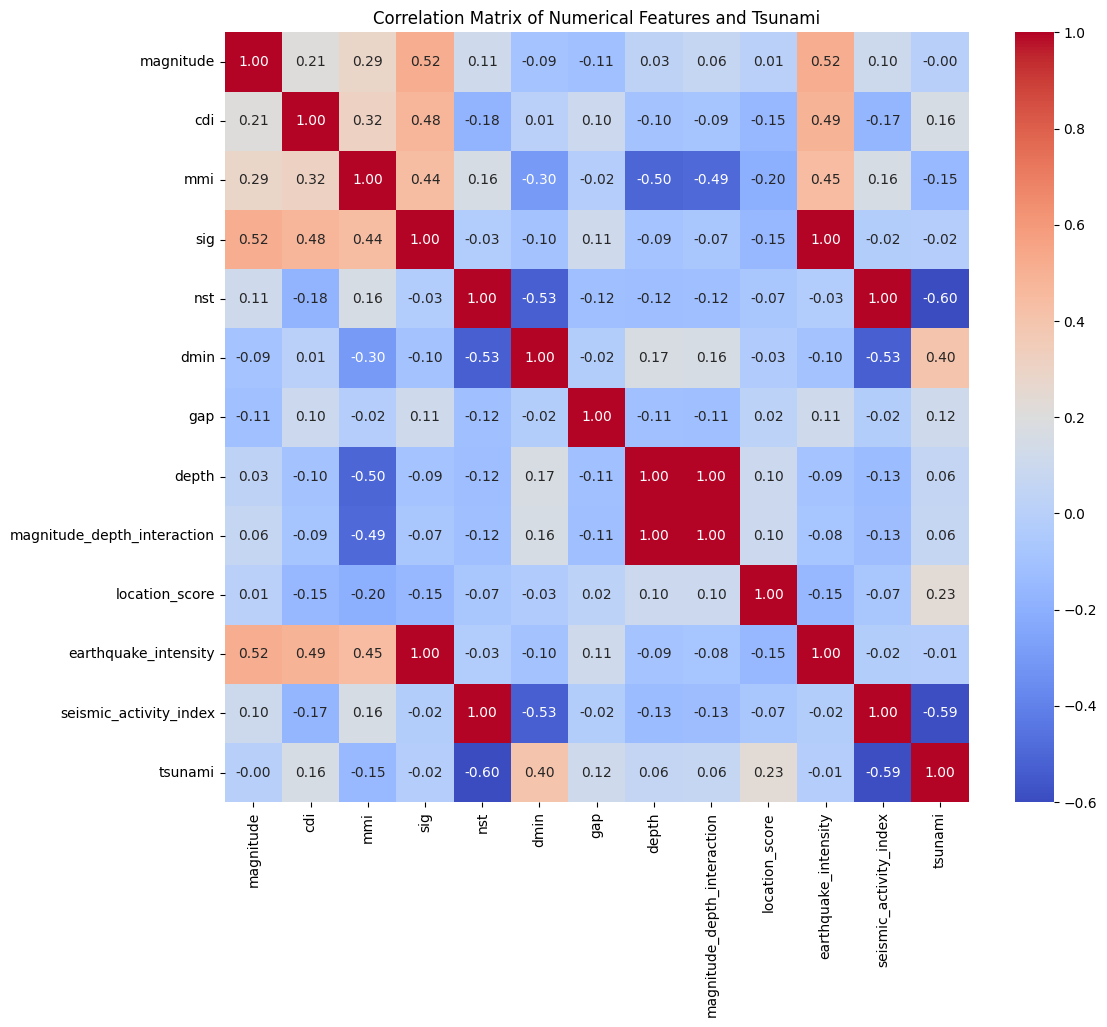

In [ ]:
# 1. Histograms for numerical features
numerical_features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
                      'magnitude_depth_interaction', 'location_score', 'earthquake_intensity', 'seismic_activity_index']
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(earthquake_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Bar plots for Year and Month
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Year', data=earthquake_data)
plt.title('Earthquake Frequency by Year')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x='Month', data=earthquake_data)
plt.title('Earthquake Frequency by Month')
plt.tight_layout()
plt.show()

# 3. Relationship between features and 'tsunami'
# Box plots for numerical features vs tsunami
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='tsunami', y=col, data=earthquake_data)
    plt.title(f'{col} vs Tsunami')
plt.tight_layout()
plt.show()

# Bar plots for categorical features vs tsunami
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Year', y='tsunami', data=earthquake_data)
plt.title('Tsunami Probability by Year')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x='Month', y='tsunami', data=earthquake_data)
plt.title('Tsunami Probability by Month')
plt.tight_layout()
plt.show()


# 4. Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = earthquake_data[numerical_features + ['tsunami']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Tsunami')
plt.show()

# Data Splitting
The dataset was split into training (70%), validation (15%), and test (15%) sets using train_test_split to ensure proper model training, tuning, and unbiased evaluation.


In [ ]:
from sklearn.model_selection import train_test_split

X = earthquake_data.drop('tsunami', axis=1)
y = earthquake_data['tsunami']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (547, 16)
Shape of X_val: (117, 16)
Shape of X_test: (118, 16)
Shape of y_train: (547,)
Shape of y_val: (117,)
Shape of y_test: (118,)


# Model Selection
The performance of the trained models was evaluated on the unseen test set using AUC-ROC, Precision, and Recall.
- **XGBoost** demonstrated the highest performance across all metrics (AUC-ROC: 0.9807, Precision: 0.9038, Recall: 0.9216).
- **Random Forest** also performed well (AUC-ROC: 0.9617, Precision: 0.8889, Recall: 0.9412).
- **Logistic Regression** had lower performance compared to the ensemble models (AUC-ROC: 0.9350, Precision: 0.8571, Recall: 0.8235).

NOTE: XGBoost was identified as the best-performing model.

## Model Training
Each selected model was trained on the training data and tuned using GridSearchCV to find the best hyperparameters. The best models were then evaluated on the validation set using AUC-ROC to select the top-performing model before final evaluation on the test set.



Train the selected classification models (Logistic Regression, Random Forest, and a Gradient Boosting Machine like XGBoost or LightGBM) using the training and validation sets and tune their hyperparameters.

In [ ]:
# Import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
# Scale the data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Instantiate the selected models with a random state for reproducibility
# Increased max_iter for Logistic Regression to address ConvergenceWarning
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
# Removed use_label_encoder as it's deprecated
xgb_clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Define hyperparameter grids for each model to search during tuning
log_reg_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_grid = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
xgb_grid = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# Perform hyperparameter tuning using GridSearchCV with 5-fold cross-validation and AUC-ROC scoring
# Use scaled data for Logistic Regression
grid_search_log_reg = GridSearchCV(log_reg, log_reg_grid, cv=5, scoring='roc_auc')
grid_search_log_reg.fit(X_train_scaled, y_train)
best_log_reg = grid_search_log_reg.best_estimator_

grid_search_rf = GridSearchCV(rf_clf, rf_grid, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_rf_clf = grid_search_rf.best_estimator_

grid_search_xgb = GridSearchCV(xgb_clf, xgb_grid, cv=5, scoring='roc_auc')
grid_search_xgb.fit(X_train, y_train)
best_xgb_clf = grid_search_xgb.best_estimator_

# Print the best hyperparameters found for each model
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluate models on the validation set
log_reg_auc = roc_auc_score(y_val, best_log_reg.predict_proba(X_val_scaled)[:, 1])
rf_clf_auc = roc_auc_score(y_val, best_rf_clf.predict_proba(X_val)[:, 1])
xgb_clf_auc = roc_auc_score(y_val, best_xgb_clf.predict_proba(X_val)[:, 1])

print("Logistic Regression AUC-ROC on validation set:", log_reg_auc)
print("Random Forest AUC-ROC on validation set:", rf_clf_auc)
print("XGBoost AUC-ROC on validation set:", xgb_clf_auc)

# Store the validation performance (optional, but good practice)
validation_performance = {
    'Logistic Regression': log_reg_auc,
    'Random Forest': rf_clf_auc,
    'XGBoost': xgb_clf_auc
}

Best parameters for Logistic Regression: {'C': 100}
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Logistic Regression AUC-ROC on validation set: 0.8876301285976731
Random Forest AUC-ROC on validation set: 0.9601959583588487
XGBoost AUC-ROC on validation set: 0.9623392529087569


# Model Evaluation

Evaluate the performance of the models using appropriate metrics (e.g., AUC-ROC, Precision, Recall) on the test set for tsunami prediction.

Calculate and print the evaluation metrics (AUC-ROC, Precision, and Recall) for each model on the test set.

In [ ]:
# Scale the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Predict probabilities on the test set
log_reg_proba_test = best_log_reg.predict_proba(X_test_scaled)[:, 1]
rf_clf_proba_test = best_rf_clf.predict_proba(X_test)[:, 1]
xgb_clf_proba_test = best_xgb_clf.predict_proba(X_test)[:, 1]

# Choose a threshold for binary classification (e.g., 0.5)
threshold = 0.5

# Make binary predictions on the test set
log_reg_pred_test = (log_reg_proba_test >= threshold).astype(int)
rf_clf_pred_test = (rf_clf_proba_test >= threshold).astype(int)
xgb_clf_pred_test = (xgb_clf_proba_test >= threshold).astype(int)

# Calculate AUC-ROC scores on the test set
log_reg_auc_test = roc_auc_score(y_test, log_reg_proba_test)
rf_clf_auc_test = roc_auc_score(y_test, rf_clf_proba_test)
xgb_clf_auc_test = roc_auc_score(y_test, xgb_clf_proba_test)

# Import precision_score and recall_score
from sklearn.metrics import precision_score, recall_score

# Calculate Precision scores on the test set
log_reg_precision_test = precision_score(y_test, log_reg_pred_test)
rf_clf_precision_test = precision_score(y_test, rf_clf_pred_test)
xgb_clf_precision_test = precision_score(y_test, xgb_clf_pred_test)

# Calculate Recall scores on the test set
log_reg_recall_test = recall_score(y_test, log_reg_pred_test)
rf_clf_recall_test = recall_score(y_test, rf_clf_pred_test)
xgb_clf_recall_test = recall_score(y_test, xgb_clf_pred_test)

# Print the evaluation metrics
print("--- Model Performance on Test Set ---")
print("Logistic Regression:")
print(f"  AUC-ROC: {log_reg_auc_test:.4f}")
print(f"  Precision: {log_reg_precision_test:.4f}")
print(f"  Recall: {log_reg_recall_test:.4f}")
print("\nRandom Forest:")
print(f"  AUC-ROC: {rf_clf_auc_test:.4f}")
print(f"  Precision: {rf_clf_precision_test:.4f}")
print(f"  Recall: {rf_clf_recall_test:.4f}")
print("\nXGBoost:")
print(f"  AUC-ROC: {xgb_clf_auc_test:.4f}")
print(f"  Precision: {xgb_clf_precision_test:.4f}")
print(f"  Recall: {xgb_clf_recall_test:.4f}")

--- Model Performance on Test Set ---
Logistic Regression:
  AUC-ROC: 0.9350
  Precision: 0.8571
  Recall: 0.8235

Random Forest:
  AUC-ROC: 0.9617
  Precision: 0.8889
  Recall: 0.9412

XGBoost:
  AUC-ROC: 0.9807
  Precision: 0.9038
  Recall: 0.9216


The performance of the trained models was evaluated on the unseen test set using AUC-ROC, Precision, and Recall.
- **XGBoost** demonstrated the highest performance across all metrics (AUC-ROC: 0.9807, Precision: 0.9038, Recall: 0.9216).
- **Random Forest** also performed well (AUC-ROC: 0.9617, Precision: 0.8889, Recall: 0.9412).
- **Logistic Regression** had lower performance compared to the ensemble models (AUC-ROC: 0.9350, Precision: 0.8571, Recall: 0.8235).


XGBoost was identified as the best-performing model.

# Feature Importance Analysis
The feature importances from the best XGBoost model were analyzed to identify the most influential features for tsunami prediction. The sorted feature importances indicated that 'Year', 'longitude', and 'location_score' were among the most important features.

Identify the most important features that contribute to tsunami prediction.

In [ ]:
import pandas as pd

# Get feature importances from the best XGBoost model
feature_importances = best_xgb_clf.feature_importances_

# Create a pandas Series with feature names as index
features = X_train.columns
feature_importances_series = pd.Series(feature_importances, index=features)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Sorted Feature Importances from XGBoost Model:")
print(sorted_feature_importances)

Sorted Feature Importances from XGBoost Model:
Year                           0.436822
longitude                      0.110643
location_score                 0.074626
magnitude_depth_interaction    0.046546
depth                          0.046307
latitude                       0.044195
magnitude                      0.034107
dmin                           0.034029
earthquake_intensity           0.030468
mmi                            0.027048
sig                            0.025666
seismic_activity_index         0.025031
cdi                            0.024502
Month                          0.016695
gap                            0.014726
nst                            0.008590
dtype: float32


# Visualization

Visualize the geographical distribution of earthquakes and tsunamis (using markers, and heatmap) to identify relevant spatial patterns.

NOTE: Visualizations may take some time to display upon running the cell below. THANK YOU!

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map centered around the mean latitude and longitude
map_center = [earthquake_data['latitude'].mean(), earthquake_data['longitude'].mean()]
earthquake_map = folium.Map(location=map_center, zoom_start=2)

# Add markers for each earthquake location, colored by tsunami occurrence
for index, row in earthquake_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Magnitude: {row['magnitude']}<br>Depth: {row['depth']}<br>Tsunami: {row['tsunami']}",
        icon=folium.Icon(color='red' if row['tsunami'] == 1 else 'blue')
    ).add_to(earthquake_map)

# Display the marker map
print("Map with earthquake locations and tsunami occurrence:")
display(earthquake_map)

# Create a list of earthquake locations (latitude, longitude) for the heatmap
earthquake_locations = earthquake_data[['latitude', 'longitude']].values.tolist()

# Create a base map for the heatmap
heatmap_map = folium.Map(location=map_center, zoom_start=2)

# Add the heatmap layer
HeatMap(earthquake_locations).add_to(heatmap_map)

# Display the heatmap
print("\nHeatmap of earthquake locations:")
display(heatmap_map)

Map with earthquake locations and tsunami occurrence:



Heatmap of earthquake locations:


# Save the Best-Performing Model

In [ ]:
import pickle

# Save the best XGBoost model to a file
filename = 'best_xgb_model.pkl'
pickle.dump(best_xgb_clf, open(filename, 'wb'))

print(f"Best XGBoost model saved to {filename}")

Best XGBoost model saved to best_xgb_model.pkl
